#Problem 3: Learning a data-driven Linear Dynamical System (LDS)

##Part B:
In this problem we will set up the optimization to learn a linear system guiding a population of neurons. For one dataset write out the probabilistic model corresponding to the discrete approximation of dxt/dt = Axt + ε where ε is independently identically distributed Gaussian noise with zero mean and standard deviation σ2I. For the discretization, use the simple approximation to the differential: dxt/dt ≈ (xt − xt−1)/dt. Now what is the same solution
when given k datasets that all follow the same dynamics? (Hint: think about each dataset as independent: what’s an important property of independent random variables with respect to their probabilities?). The derived likelihood represents P(x|A). Use this to set up a ML estimate of A. Code up in MATLAB the solution you derived and run on the jPCA dataset. Reconstruct the data by taking each xt and predicting xt+1 by taking one step given the dynamical system
you found (via the discrete equation you derived above). Compute the reconstruction error of the data (norm of the difference between the estimated xt+1 and the real xt+1), and plot the histogram of these errors across all time-points.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


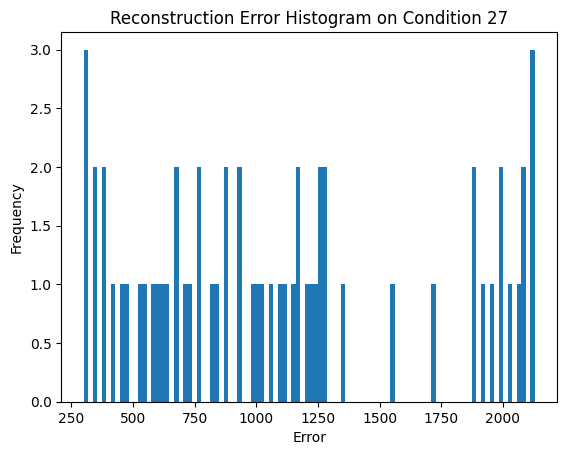

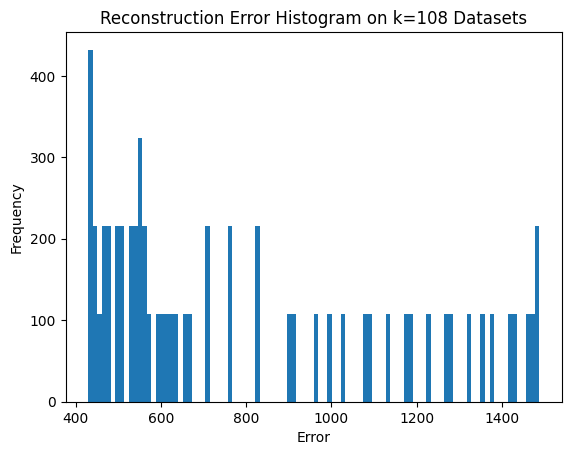

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Find the file in google drive
drive.mount('/content/drive')
file = "/content/drive/MyDrive/Neural_Signals_and_Computation_HW2/exampleData.mat"

import scipy.io as sio
mat_contents = sio.loadmat(file)
data = mat_contents['Data']
# Data is the struct (length = 1)
# Data[c] is the condition (length = 108)
# Data[c][o] are the fields options (length = 2)
# Data[c][o][0] is the A matrix (shape = (61, 218))
# Data[c][o][1] is the time (shape = (61, 1))

condition27 = data[0][27]
cond27_A = condition27[0].transpose()
cond27_t = condition27[1]

# Calculate the discrete matrix dx/dt
dx_dt = []
xt = []
for i in range(cond27_A.shape[1] - 1):
  current = cond27_A[:,i + 1]
  prev = cond27_A[:,i]
  current_t = cond27_t[i + 1]
  prev_t = cond27_t[i]

  dx_dt.append((current - prev) / (current_t - prev_t))
  xt.append(current)

xt = np.array(xt)
dx_dt = np.array(dx_dt)
A_estimated27 = np.linalg.lstsq(xt, dx_dt, rcond=None)[0]

# Reconstruction
errors = []
condition_k = data[0][27]
cond_A = condition_k[0].transpose()
cond_t = condition_k[1]
for t in range(1, cond_A.shape[1]):
  x_pred = cond_A[:,t-1] + (cond_t[t] - cond_t[t-1]) * np.matmul(A_estimated27, cond_A[:,t-1])
  error = np.linalg.norm(x_pred - cond_A[:,t])
  errors.append(error)

# Plot the histogram of errors
plt.hist(errors, bins=100)
plt.title('Reconstruction Error Histogram on Condition 27')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Now for k datasets
dx_dt = []
xt = []
for k in range(len(data[0])):
  condition_k = data[0][k]
  cond_A = condition_k[0].transpose()
  cond_t = condition_k[1]

  for i in range(cond_A.shape[1] - 1):
    current = cond_A[:,i + 1]
    prev = cond_A[:,i]
    current_t = cond_t[i + 1]
    prev_t = cond_t[i]

    dx_dt.append((current - prev) / (current_t - prev_t))
    xt.append(current)

xt = np.array(xt)
dx_dt = np.array(dx_dt)
A_estimated_k = np.linalg.lstsq(xt, dx_dt, rcond=None)[0]

# Reconstruction
errors = []
for i in range(len(data[0])):
  condition_k = data[0][k]
  cond_A = condition_k[0].transpose()
  cond_t = condition_k[1]
  for t in range(1, cond_A.shape[1]):
    x_pred = cond_A[:,t-1] + (cond_t[t] - cond_t[t-1]) * np.matmul(A_estimated_k, cond_A[:,t-1])
    error = np.linalg.norm(x_pred - cond_A[:,t])
    errors.append(error)

# Plot the histogram of errors
plt.hist(errors, bins=100)
plt.title('Reconstruction Error Histogram on k=108 Datasets')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()